# Adult Mortality Rate

## Organization: WHO (World Health Organization)

Link: https://www.kaggle.com/dhamur/adult-mortality-rate

In [1]:
import numpy as np
import pandas as pd
df=pd.read_csv('Both sexes.csv')
df.head()

,Unnamed: 0,ParentLocation,Location,Period,Sex,Adult mortality rate,DateModified
0,0,Americas,Barbados,2016,Both sexes,100.4,2018-05-06T18:30:00.000Z
1,1,Europe,Serbia,2016,Both sexes,102.5,2018-05-06T18:30:00.000Z
2,2,Europe,Turkey,2016,Both sexes,104.0,2018-05-06T18:30:00.000Z
3,3,Europe,Slovakia,2016,Both sexes,104.1,2018-05-06T18:30:00.000Z
4,4,Western Pacific,Samoa,2016,Both sexes,110.4,2018-05-06T18:30:00.000Z


## Dataset description

In [2]:
df.describe()

,Unnamed: 0,Period,Adult mortality rate
count,3111.00000,3111.000000,3111.000000
mean,1555.00000,2008.000000,193.527178
std,898.21267,4.899767,114.007147
min,0.00000,2000.000000,49.200000
25%,777.50000,2004.000000,108.250000
50%,1555.00000,2008.000000,164.800000
75%,2332.50000,2012.000000,250.800000
max,3110.00000,2016.000000,696.900000


This dataset explains the adult mortality rate per 1000 population of almost all countries around the world. This data is divided so we can extract mortality rates from both sexes indivdually and as a whole. Additionally, it contains 'period', a section which helps us to locate rates of a specific country between the years 2000-2016.

Variables of interest

'Location': shows the country.

'Period': shows the year.

'Adult mortality rate': displays the mortality rate. 

# Questions

## 1. What was the mortality rate for Mexico in 2016?

In [3]:
df.set_index('Location',inplace=True)
MEXdf=df.loc[['Mexico']]
MEXdf

,Unnamed: 0,ParentLocation,Period,Sex,Adult mortality rate,DateModified
Location,,,,,,
Mexico,22,Americas,2016,Both sexes,126.6,2018-05-06T18:30:00.000Z
Mexico,205,Americas,2015,Both sexes,128.4,2018-05-06T18:30:00.000Z
Mexico,388,Americas,2014,Both sexes,129.1,2018-05-06T18:30:00.000Z
Mexico,568,Americas,2013,Both sexes,126.8,2018-05-06T18:30:00.000Z
Mexico,758,Americas,2012,Both sexes,131.0,2018-05-06T18:30:00.000Z
Mexico,941,Americas,2011,Both sexes,132.9,2018-05-06T18:30:00.000Z
Mexico,1129,Americas,2010,Both sexes,135.6,2018-05-06T18:30:00.000Z
Mexico,1306,Americas,2009,Both sexes,135.6,2018-05-06T18:30:00.000Z
Mexico,1485,Americas,2008,Both sexes,133.0,2018-05-06T18:30:00.000Z


Using .set_index() and the .loc[] indexer , we can observe that the mortality rate for Mexico in 2016 was 126.60.

## 2. What is the highest mortality rate registered since 2000? 

In [4]:
pd.pivot_table(df,
               index='Location',
               aggfunc='max',
               values='Adult mortality rate',
               margins=True,
              ).tail(3)

,Adult mortality rate
Location,
Zambia,594.2
Zimbabwe,696.9
All,696.9


Observing the pivot table, we can say that Zimbabwe had the highest mortality rate of the 16 periods.

## 3. Compare male and female mortality rates

In [5]:
#pip install seaborn

In [6]:
#pip install plotly

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import plotly.express as px

In [8]:
df1=pd.read_csv('female.csv')

In [9]:
df2=pd.read_csv('male.csv')

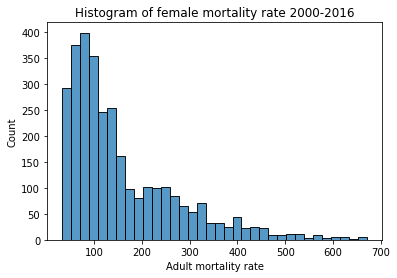

In [10]:
sns.histplot(df1['Adult mortality rate'], 
             kde = False).set_title("Histogram of female mortality rate 2000-2016")
plt.show()

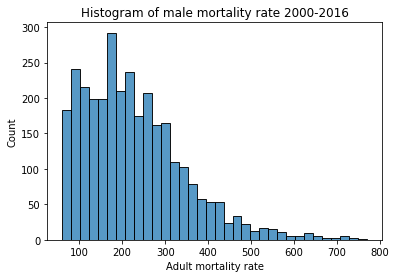

In [11]:
sns.histplot(df2['Adult mortality rate'], 
             kde = False).set_title("Histogram of male mortality rate 2000-2016")
plt.show()

In conclusion, comparing both histograms we can state that there are larger counts of men population with rates exceeding the 200 mark meaning that men population have higher rates than women. 

## 4. Plot Russia's mortality rates from 2000 to 2016

In [12]:
RUSdf=df.loc[['Russian Federation']]
#RUSdf

In [13]:
RUS_mr=pd.pivot_table(index=['Location','Period'],
                       values='Adult mortality rate',
                       data=RUSdf,
                       margins=True
                      )
RUS_mr2=RUS_mr.head(17)

In [14]:
mpl.style.use('ggplot')

Text(0.5, 1.0, 'Mortality rate of Russia from 2000 to 2016')

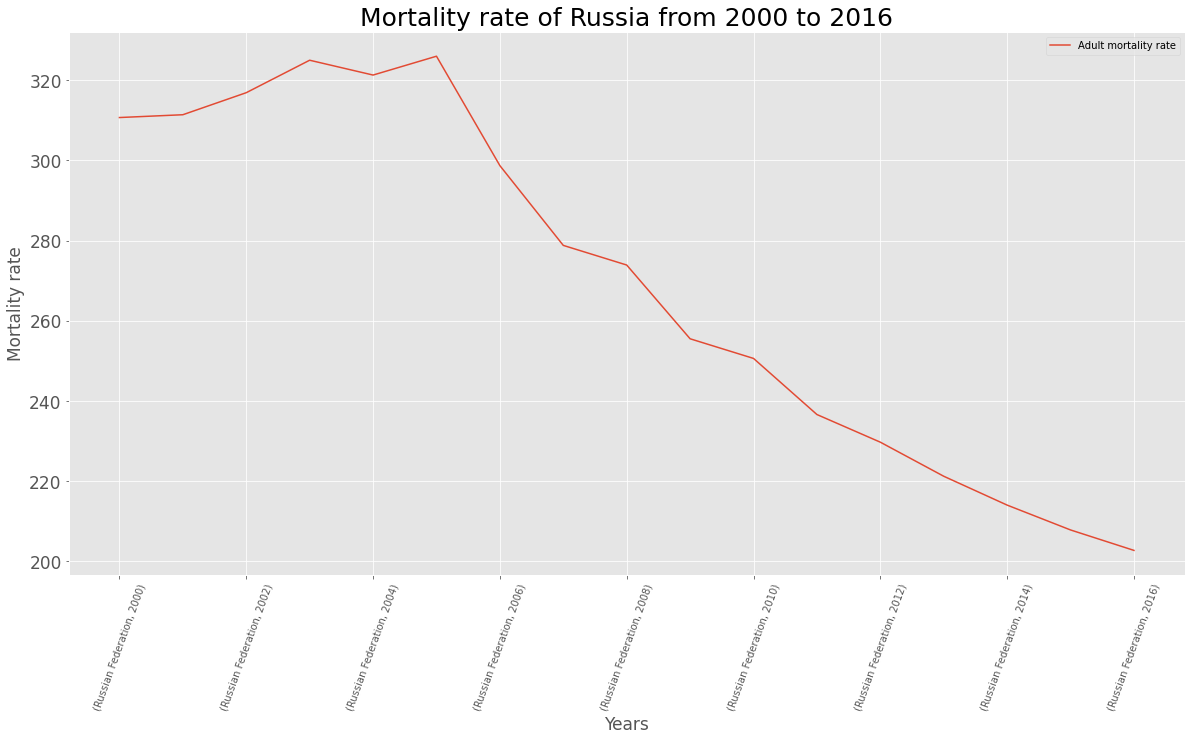

In [15]:
RUS_mr2.plot(figsize=(20,10))
plt.xlabel('Years',fontsize=17)
plt.xticks(fontsize=10, rotation=70)
plt.ylabel('Mortality rate',fontsize=17)
plt.yticks(fontsize=17)
plt.title('Mortality rate of Russia from 2000 to 2016',fontsize=25)

We can conclude from the previous chart that Russia's mortality rate from both sexes has been suffering a huge reduction since the year 2005. On top of that, we can affirm that Russia's worst year was 2005.

## 5. Compare Mexico and Russia's mortality rates

In [16]:
mpl.style.use('ggplot')

In [17]:
RUSMEXdf=df.loc[['Russian Federation','Mexico']]
#RUSMEXdf

In [18]:
RUSMEX_mr=pd.pivot_table(index=['Location','Period'],
                       values='Adult mortality rate',
                       data=RUSMEXdf,
                       margins=True
                      )
RUSMEX_mr2=RUSMEX_mr.head(34)
#RUSMEX_mr2

Text(0.5, 1.0, 'Russia-Mexico mortality rates')

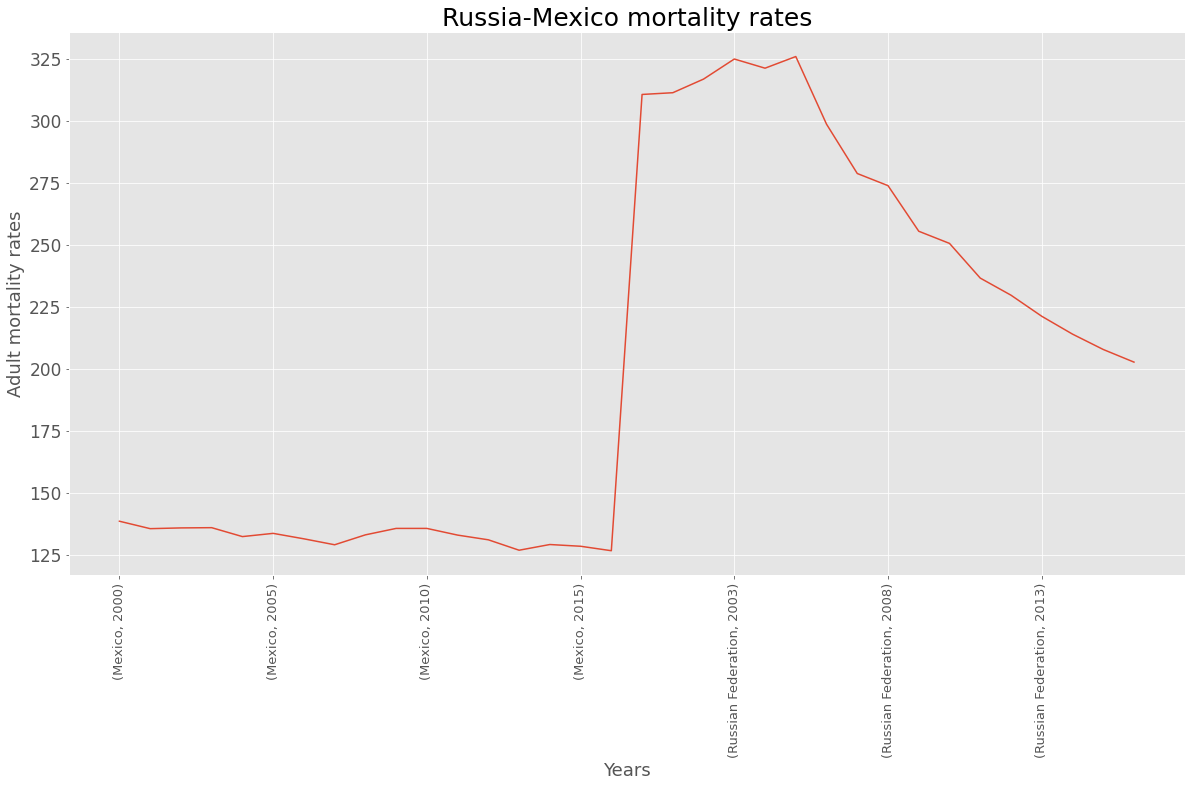

In [19]:
RUSMEX_data=RUSMEX_mr2.loc[['Russian Federation','Mexico'],'Adult mortality rate']
nRUSMEX=RUSMEX_data.transpose()
nRUSMEX.plot(figsize=(20,10))
plt.xlabel('Years',fontsize=18)
plt.xticks(fontsize=13, rotation=90)
plt.ylabel('Adult mortality rates',fontsize=18)
plt.yticks(fontsize=17)
plt.title('Russia-Mexico mortality rates',fontsize=25)

Comparing both countries, we can observe that Mexico's mortality rates are way below the average of Russia's. However, Mexico's mortality rates have maintained nearly a linear behavior in contrast with Russia, where there has been a clear negative slope. 

## 6. Show a box plot of female and male mortality rates

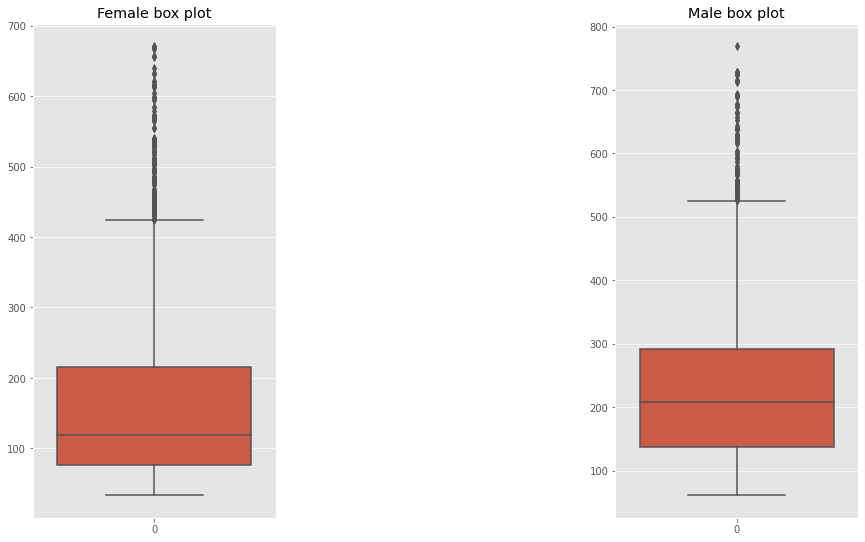

In [22]:
fig = plt.figure()
plt.rcParams['figure.figsize']=(20,20)
ax1 = fig.add_subplot(2,4,1)
sns.boxplot(data = df1.loc[:,'Adult mortality rate'])
                          
ax2 = fig.add_subplot(2,4,3)
sns.boxplot(data = df2.loc[:,'Adult mortality rate'])

ax1.title.set_text('Female box plot')
ax2.title.set_text('Male box plot')

plt.show()

Both box plots allow us to notice the differences between the female and male mortality rates from 2000 to 2016. At first, the male box plot shows a higher median than the female's, meaning that the male gender tends to experience higher mortality rates overall. In addition, both box plots display skews, specifically to the right, pointing out that both datas are not normally distributed.

## Make a regression analysis

In [23]:
df.corr()

,Unnamed: 0,Period,Adult mortality rate
Unnamed: 0,1.000000,-0.998268,0.180696
Period,-0.998268,1.000000,-0.170948
Adult mortality rate,0.180696,-0.170948,1.000000


Due to the low quantity of numeric variables and their poor association in this dataset, it is not possible to make a regression analysis. 